In [218]:
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import fig_text
from mplsoccer import PyPizza, FontManager
from PIL import Image

In [219]:
df=pd.read_html('https://fbref.com/en/stathead/player_comparison.cgi?show_form=1&request=1&sum=0&comp_type=by_type&dom_lg=1&player_id1=8e92be30&p1yrfrom=2024-2025&player_id2=5b92d896&p2yrfrom=2024-2025', attrs={"id": "standard_stats"})[0]

In [220]:
df

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Player               Span             Nation                Pos   
0     Alexander Isak            2024-25             se SWE                 FW   
1       Hugo Ekitike            2024-25             fr FRA                 FW   

  Unnamed: 4_level_0 Playing Time                    Performance  ...  \
               Squad           MP Starts   Min   90s         Gls  ...   
0      Newcastle Utd           34     34  2756  30.6          23  ...   
1     Eint Frankfurt           33     31  2563  28.5          15  ...   

  Per 90 Minutes                                                             
             Gls   Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0           0.75  0.20  0.95  0.62   0.82  0.66  0.14   0.81  0.56     0.70  
1           0.53  0.28  0.81  0.49   0.77  0.76  0.24   0.99  0.68     0.91  

[2 rows x 34 columns]

In [221]:
df.columns=df.columns.droplevel(0)

In [222]:
df

,Player,Span,Nation,Pos,Squad,MP,Starts,Min,90s,Gls,...,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG
0,Alexander Isak,2024-25,se SWE,FW,Newcastle Utd,34,34,2756,30.6,23,...,0.75,0.20,0.95,0.62,0.82,0.66,0.14,0.81,0.56,0.70
1,Hugo Ekitike,2024-25,fr FRA,FW,Eint Frankfurt,33,31,2563,28.5,15,...,0.53,0.28,0.81,0.49,0.77,0.76,0.24,0.99,0.68,0.91


In [223]:
df.columns

Index(['Player', 'Span', 'Nation', 'Pos', 'Squad', 'MP', 'Starts', 'Min',
       '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG',
       'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls', 'Ast', 'G+A',
       'G-PK', 'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG'],
      dtype='object')

In [224]:
params=[
    'Goals', 'Assists','Non-Penalty Goals\n G-PK','Non-Penalty\n Goals & Assists\n G+A-PK','Expected Goals\n xG',
    'Expected Assisted\n Goals\n xAG','xG+xAG','Non-Penalty\n Expected Goals\n npxG'
]

values=[
    0.75,0.20,0.62,0.82,0.66,0.14,0.81,0.56] #Alexander Isak
values_2=[
    0.53,0.28,0.49,0.77,0.76,0.24,0.99,0.68] #Hugo Ekitike

In [295]:
#Minimum range values and maximum range values for paramaters
min_range=[0,0,0,0.7,0,0,0,0]
max_range=[1,0.4,0.9,0.9,1,0.5,1.1,0.8]

In [297]:
#Instatiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#EBEBE9", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, other_circle_lw=0,
    other_circle_color="#000000", straight_line_lw=1
)

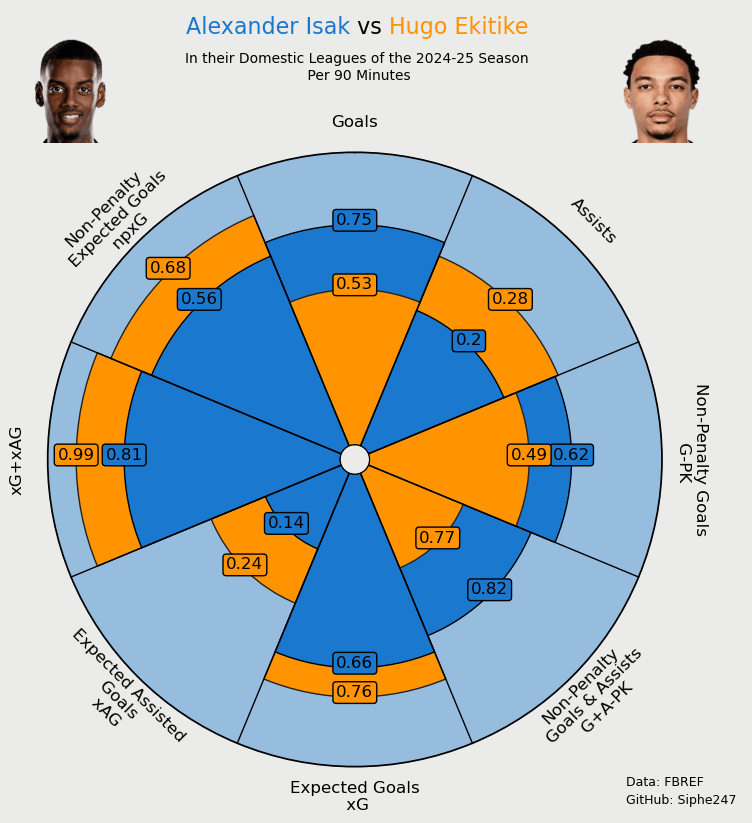

In [299]:
#Plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # passing comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#ff9300", edgecolor="#222222", zorder=3, linewidth=1,
    ),                          # values to be used when plotting comparison slices
    kwargs_params=dict(
        color="#000000", fontsize=12, zorder=5, #Colours of the parameters
        va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                           # values to be used when adding parameter-values
    kwargs_compare_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#FF9300",
            boxstyle="round,pad=0.2", lw=1
        )
    )                            
)

#Add title
fig_text(
    0.515, 1.05, "<Alexander Isak> vs <Hugo Ekitike>",
    size=16, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#FF9300'}],
    ha="center",color="#000000"
)

#Add subtitle
fig.text(
    0.515, 0.97, "In their Domestic Leagues of the 2024-25 Season\n Per 90 Minutes",
    size=10,
    ha="center", color="#000000"
)

#Add player images
ax2 = fig.add_axes([.09,0.89,.13,.13])
ax2.axis('off')
img = Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Isak.png')
ax2.imshow(img)
ax=fig.add_axes([.83,0.89,.13,.13])
ax.axis('off')
img3=Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Ekitike.png')
ax.imshow(img3)

#Add credits
CREDIT_1="Data: FBREF"
CREDIT_2="GitHub: Siphe247"

fig_text(
    0.99, 0.1, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#000000",
    ha="right"
)

plt.savefig('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Ekitike vs Isak per 90.png', dpi=300, bbox_inches='tight')